# SHAP Values Example

%pip install shap

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Regression Problem - Melbourne Housing Prices Dataset

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

In [5]:
df = df.dropna()
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,2.0,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,3.0,2.0,1.0,113.0,110.0,1880.0,Yarra City Council,-37.8056,144.9930,Northern Metropolitan,4019.0


In [6]:
df = df.dropna(axis=0,thresh=20)
df['YearBuilt'] = df['YearBuilt'].fillna(1995)
meanBuildingArea = df['BuildingArea'].sum()/df['BuildingArea'].count()
df['BuildingArea'] = df['BuildingArea'].fillna(meanBuildingArea)
df['CouncilArea'] = df['CouncilArea'].fillna(method='ffill')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [7]:
df.shape

(8887, 21)

In [8]:
Y = df['Price']
X = df[[i for i in df.columns if i!='Price' and df[i].dtype in [np.int64, np.float64]]]
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 1)

## Linear Regressor

In [9]:
lr = LinearRegression()
lr_model = lr.fit(train_X, train_Y)

In [10]:
lr_model.predict([train_X.loc[11]])

X does not have valid feature names, but LinearRegression was fitted with feature names


array([1769727.39783725])

In [11]:
train_Y.loc[11]

1876000.0

In [12]:
from sklearn.metrics import r2_score

In [13]:
y_pred = lr_model.predict(val_X)

In [14]:
r2_score(val_Y, y_pred)

0.5951699683277436

In [15]:
val_X.values[0]

array([ 3.0000000e+00,  1.5300000e+01,  3.0740000e+03,  3.0000000e+00,
        1.0000000e+00,  2.0000000e+00,  7.2700000e+02,  1.0900000e+02,
        1.9520000e+03, -3.7678730e+01,  1.4501878e+02,  7.9550000e+03])

In [16]:
val_Y.values[0]

740000.0

In [17]:
y_pred[0]

648088.1694680154

### Shap Values

In [18]:
explainer = shap.LinearExplainer(lr_model, val_X)
shap_values = explainer(val_X)

In [19]:
shap_values[0]

.values =
array([  -5301.08938545, -157189.61630534,  -21723.50564051,
          -982.26315043, -128141.47843436,   28219.86599363,
          6013.03882793,  -49997.12987594,   63497.74410516,
       -153046.97805976,   19438.29782781,   -1826.34719214])

.base_values =
1049127.6307574213

.data =
array([ 3.0000000e+00,  1.5300000e+01,  3.0740000e+03,  3.0000000e+00,
        1.0000000e+00,  2.0000000e+00,  7.2700000e+02,  1.0900000e+02,
        1.9520000e+03, -3.7678730e+01,  1.4501878e+02,  7.9550000e+03])

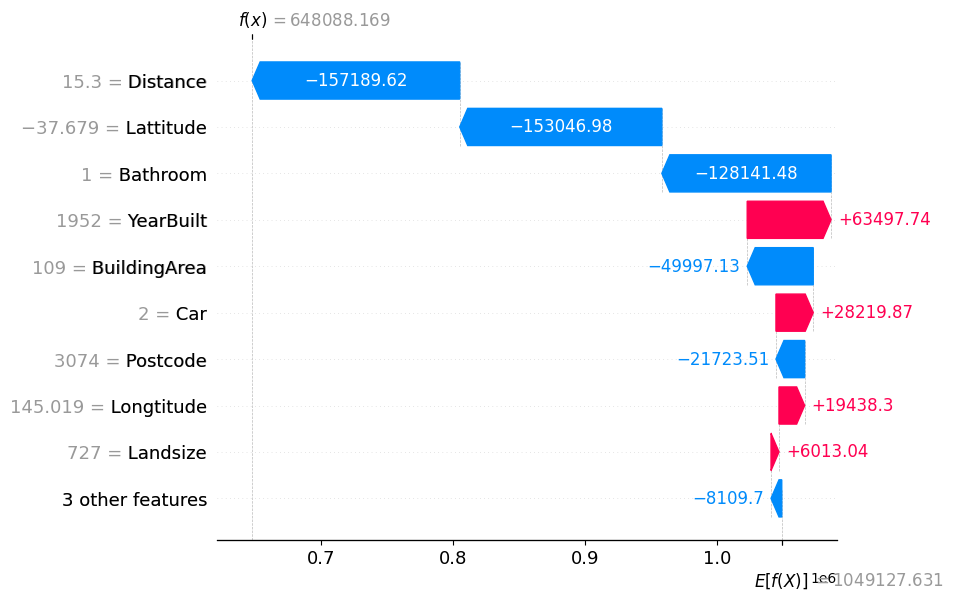

In [20]:
shap.plots.waterfall(shap_values[0])

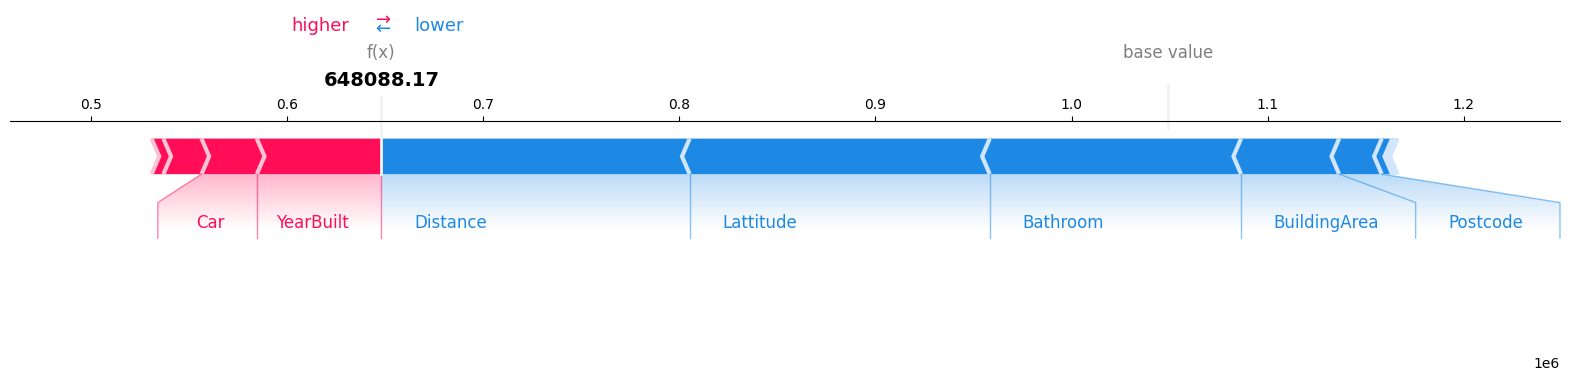

In [21]:
shap.plots.force(explainer.expected_value, shap_values.values[0],feature_names=val_X.columns, matplotlib=True)

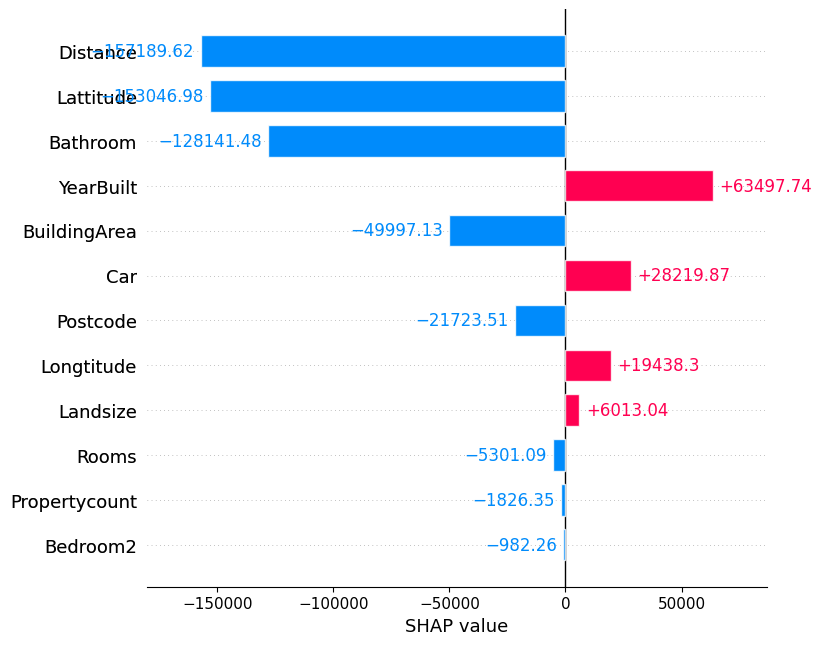

In [22]:
shap.plots.bar(shap_values[0],max_display=len(val_X.columns),show=True)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


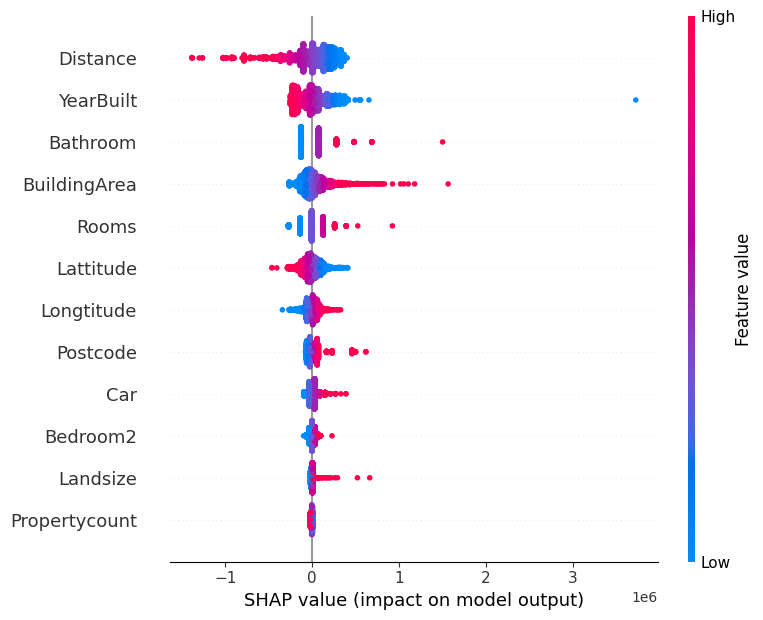

In [23]:
shap.summary_plot(shap_values, val_X)

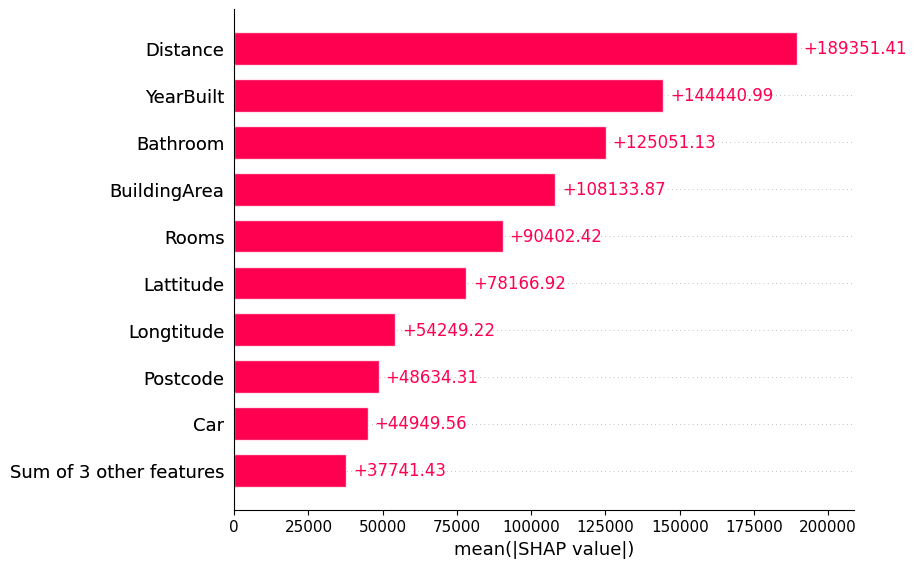

In [24]:
shap.plots.bar(shap_values)

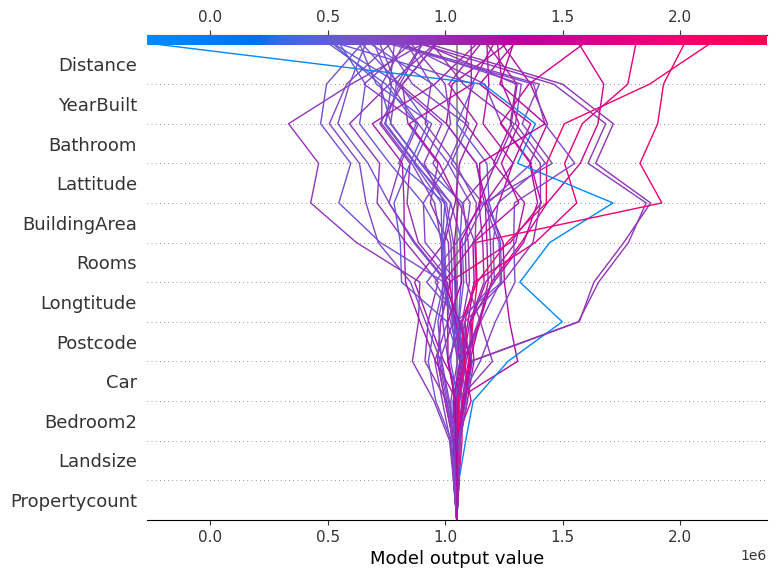

In [25]:
shap.decision_plot(explainer.expected_value, shap_values.values[0:50], val_X.columns)

# XGBoost Regressor

In [26]:
xgbr = XGBRegressor()
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.fit_transform(val_X)
val_X_mean = scaler.mean_
val_X_std = scaler.var_**(1/2)

In [27]:
xgbr_model = xgbr.fit(train_X_scaled, train_Y)

In [28]:
est = xgbr_model.predict(val_X_scaled)

In [29]:
r2_score(val_Y, est)

0.7776756538103694

In [30]:
xgbr_model.predict([train_X_scaled[1]])

array([1089443.5], dtype=float32)

In [31]:
train_Y.head()

13207    1620000.0
31715    1090000.0
19587     540000.0
13599    1090000.0
7106      680000.0
Name: Price, dtype: float64

In [67]:
explainer = shap.TreeExplainer(xgbr_model, val_X_scaled)
shap_values = explainer.shap_values(val_X_scaled)


In [59]:
shap_values[1]

array([  23347.03086456, -103328.83246525,  -76542.1513443 ,
         -1745.10378281,  -19801.05490936,   14590.93031952,
        105432.15056641,   -9344.06040764,  -80460.87845932,
       -254388.90927544,  101923.38659668,    7940.08077271])

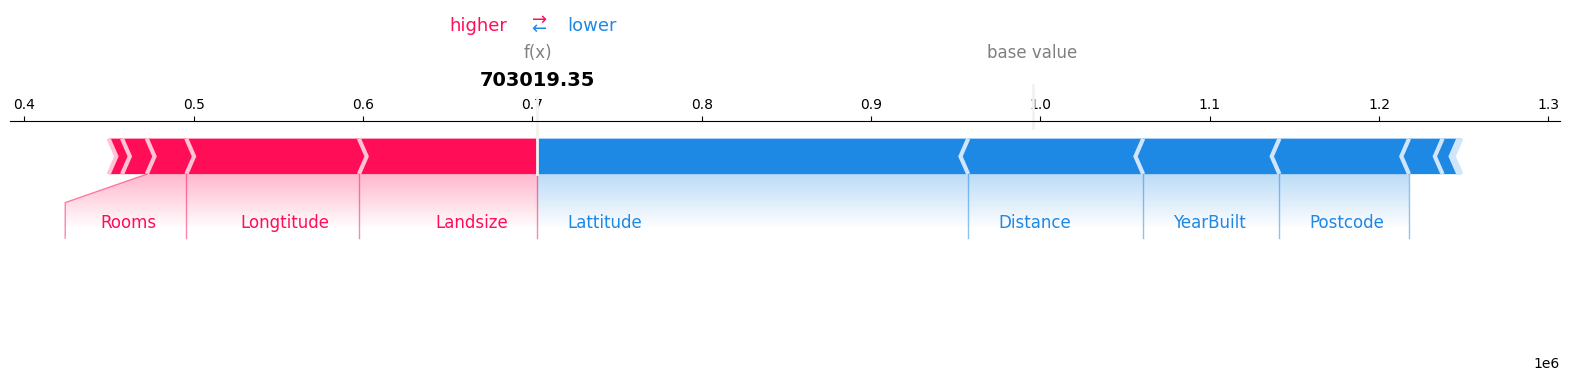

In [57]:
shap.force_plot(explainer.expected_value, shap_values[1], feature_names=val_X.columns, matplotlib=True)

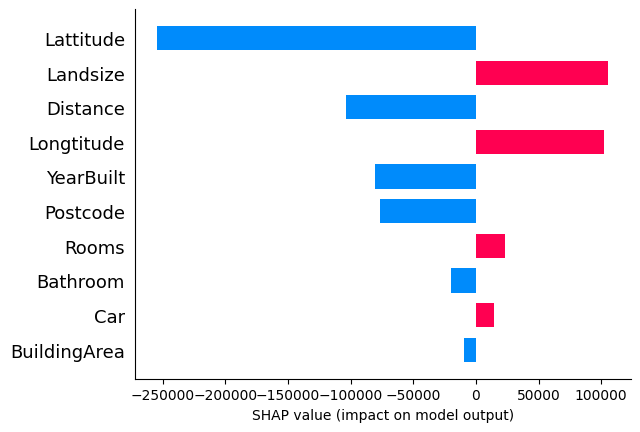

In [77]:
shap.bar_plot(shap_values[1], feature_names=val_X.columns, max_display=10, show=True)

### Summary Plots

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


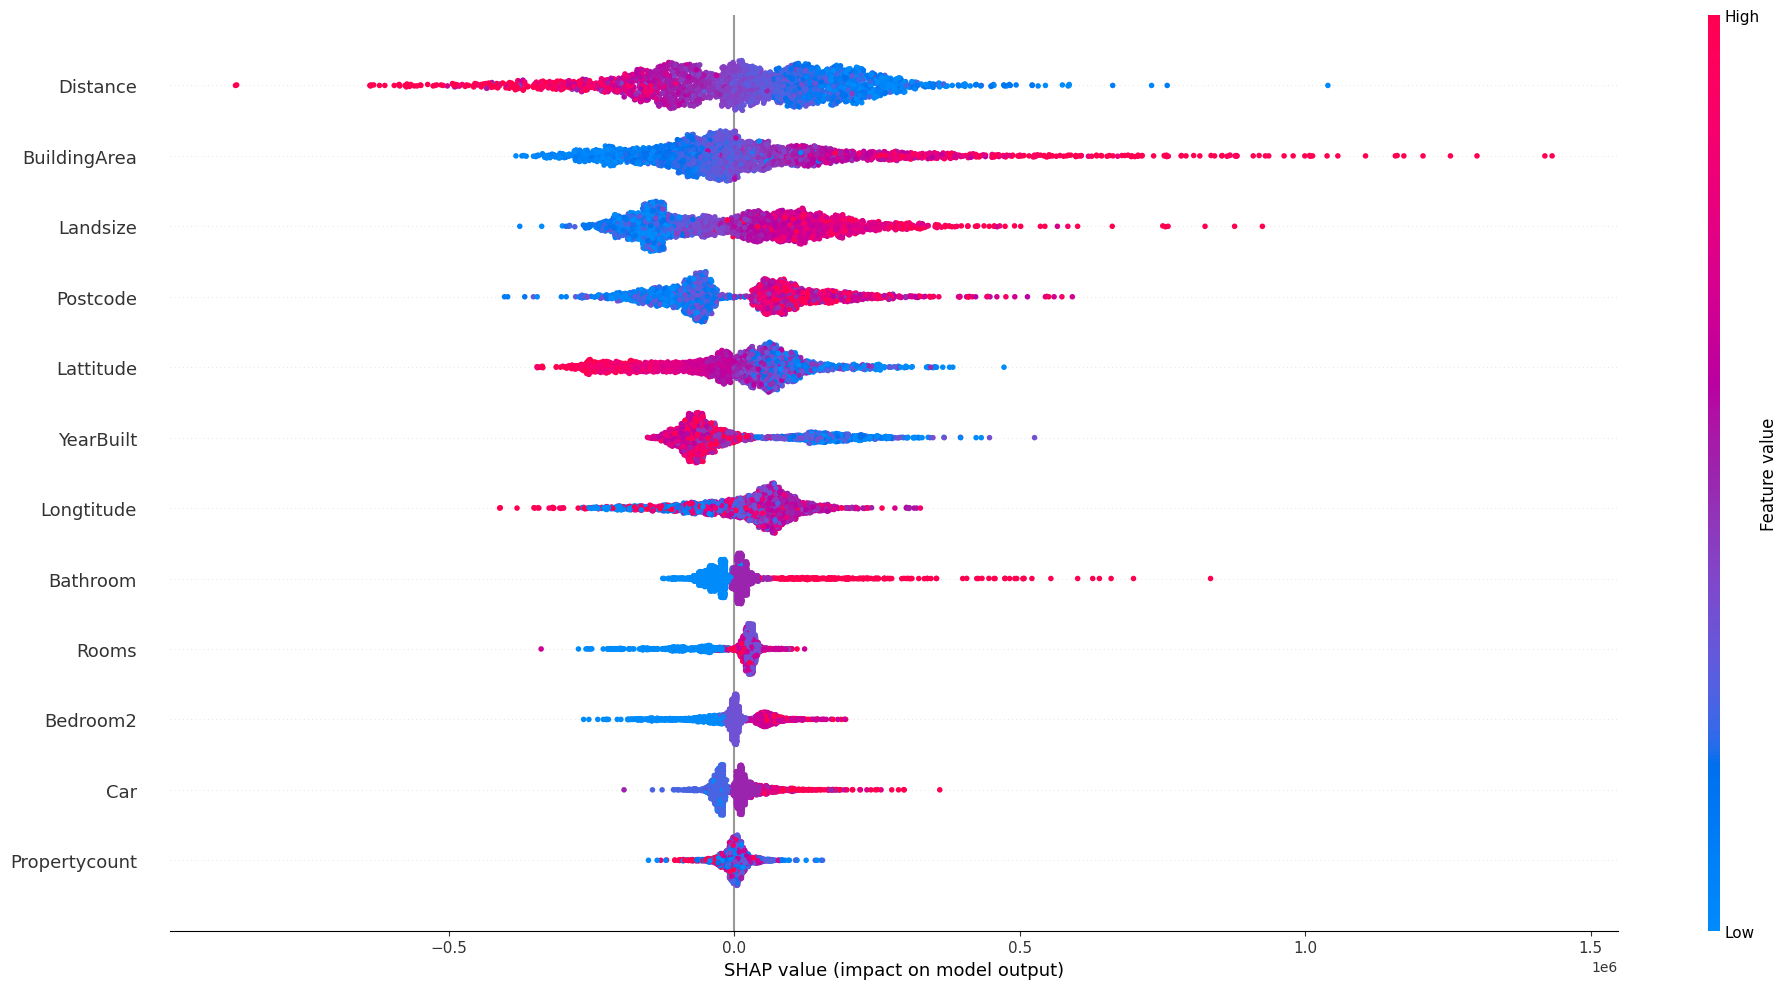

In [66]:
shap.summary_plot(shap_values, val_X_scaled, feature_names=val_X.columns, plot_size=(20.0,10.0))

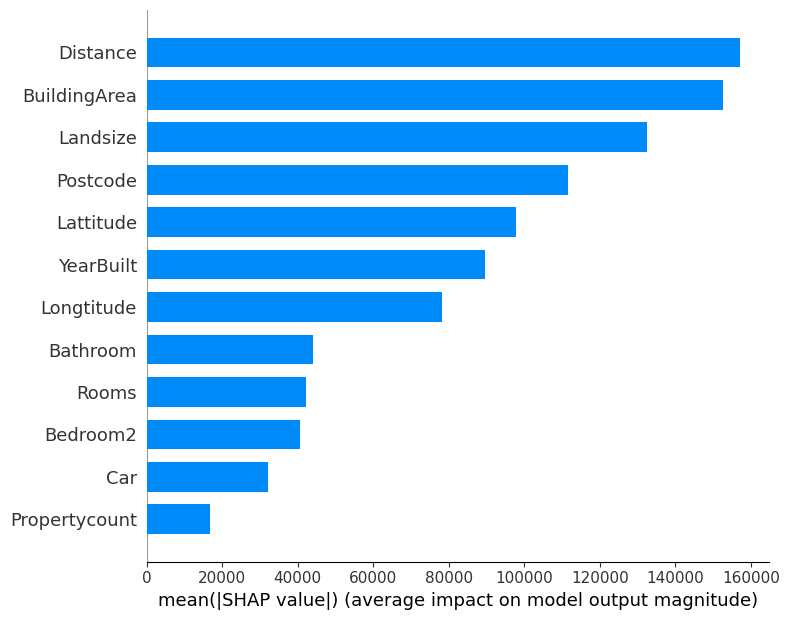

In [78]:
shap.summary_plot(shap_values, val_X, plot_type="bar", feature_names=val_X.columns)